In [4]:
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [145]:
dt = 0.001
dt_param = 0.03
n = 3
t_end = 100
coll_time = 0
coll_time_q = 1e300

In [146]:
q = t_end/dt
r = np.zeros((n,3))
v = np.zeros((n,3))
a = np.zeros((n,3))
jk = np.zeros((n,3))
old_r = np.zeros((n,3))
old_v = np.zeros((n,3))
old_a = np.zeros((n,3))
old_jk = np.zeros((n,3))
rji = np.zeros((3))
vji = np.zeros((3))
da = np.zeros((3))
dj = np.zeros((3))
e_in = np.zeros((2))
ekin = 0
epot = 0

result = np.zeros((int(q),n,3))

In [190]:
m = [100000,1,1]
# r[0,:] = (0.9700436,-0.24308753,0)
# r[1,:] = (-0.9700436,0.24308753,0)
# r[2,:] = (0,0,0)
# v[0,:] = (0.466203685,0.43236573,0)
# v[1,:] = (0.466203685,0.43236573,0)
# v[2,:] = (-2*v[0,0],-2*v[0,1],0)
r[0,:] = (0,0,0.)
r[1,:] = (2,0,0.)
r[2,:] = (5,0,0.)
v[0,:] = (0.,0.,0.)
v[1,:] = (-100.,170.,0.)
v[2,:] = (-55.,100.,0.)
v[0][0] += 0.0001 #instability

In [191]:
def calculation (m,r,v,a,jk,n,coll_time_q,coll_time):
    
    jk[:,:] = a[:,:] = 0
    coll_time_q = 1e300
    
    for i in range (0,n):
        for j in range (i+1,n):
            for k in range (0,3):
                rji[k] = r[j,k] - r[i,k]
                vji[k] = v[j,k] - v[i,k]

            r2 = 0
            v2 = 0

            for k in range(0,3):
                r2 += rji[k]**2
                v2 += vji[k]**2

            coll_est_sq = r2**2/v2**2
            if (coll_time_q > coll_est_sq):
                coll_time_q = coll_est_sq

            r3 = r2 * np.sqrt(r2)
            rv = 0
            for k in range(0,3):
                rv += rji[k]*vji[k]
            rv /= r2

            for k in range(0,3):
                da[k] = rji[k] / r3
                dj[k] = (vji[k] - 3 * rv * rji[k]) / r3

            for k in range(0,3):
                a[i,k] += m[j]*da[k]
                a[j,k] -= m[i]*da[k]
                jk[i,k] += m[j] * dj[k]
                jk[j,k] -= m[i] * dj[k]

            da2 = 0
            for k in range(0,3):
                da2 += da[k] * da[k]

            da2 *= (m[i] + m[j])**2
            coll_est_q = r2/da2
            if (coll_time_q > coll_est_q):
                coll_time_q = coll_est_q
        
    coll_time = np.sqrt(np.sqrt(coll_time_q))

    return(m,r,v,a,jk,n,coll_time)

In [192]:
def energy (m,r,v,n):
    ekin = 0
    epot = 0

    for i in range (0,n):
        for j in range (i+1,n):
            for k in range (0,3):
                rji[k] = r[j,k] - r[i,k]
            r2 = 0
            for k in range (0,3):
                r2 += rji[k]*rji[k]
            epot -= m[0]*m[0]/np.sqrt(r2)  

        for k in range (0,3):
            ekin += 0.5*m[0]*v[i,k]*v[i,k]
    return(ekin + epot)

In [193]:
calculation (m,r,v,a,jk,n,coll_time_q,coll_time)
# dt = dt_param * coll_time
print(energy(m,r,v,n))

-7737083333.332834


In [194]:
for t in range (0,int(q)):
    result[t,] = r
    for i in range (0,n):
        for k in range (0,3):
            old_r[i,k] = r[i,k]
            old_v[i,k] = v[i,k]
            old_a[i,k] = a[i,k]
            old_jk[i,k] = jk[i,k]
            r[i,k] += v[i,k]*dt + (a[i,k]*dt*dt)/2 + (jk[i][k]*dt*dt*dt)/6
            v[i,k] += a[i,k]*dt + (jk[i,k]*dt*dt)/2
            
    m,r,v,a,jk,n,coll_time = calculation (m,r,v,a,jk,n,coll_time_q,coll_time)
    
    for i in range (0,n):
        for k in range (0,3):
            v[i,k] = old_v[i,k] + (old_a[i,k] + a[i,k])*dt/2 + (old_jk[i,k] - jk[i,k])*dt**2/12
            r[i,k] = old_r[i,k] + (old_v[i,k] + v[i,k])*dt/2 + (old_a[i,k] - a[i,k])*dt**2/12
    
    dt = dt_param * coll_time

In [195]:
print(energy(m,r,v,n))

-6377821312.864557


<IPython.core.display.Javascript object>


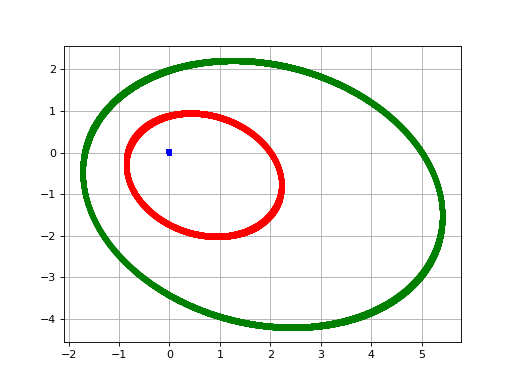

In [196]:
fig, ax1 = plt.subplots()
ax1.plot(result[:,0,0],result[:,0,1], '.b')
ax1.plot(result[:,1,0],result[:,1,1], '.r')
ax1.plot(result[:,2,0],result[:,2,1], '.g')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.grid(True)
# plt.savefig('contour_sobol.png')
# plt.title('Sobol sequence')
plt.draw()

<IPython.core.display.Javascript object>


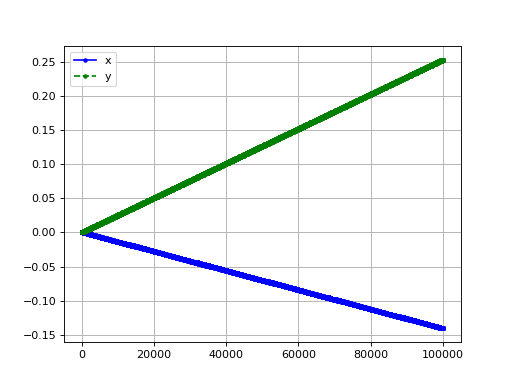

In [154]:
fig, ax1 = plt.subplots()
ax1.plot(result[:,0,0], 'b.-')
ax1.plot(result[:,0,1], '.g--')
# ax1.plot(result[:,1,0],result[:,1,1], '.r')
# ax1.plot(result[:,2,0],result[:,2,1], '.g')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.xlim(-10,10)
# plt.ylim(-10,10)
ax1.legend(['x','y'])
plt.grid(True)
# plt.savefig('contour_sobol.png')
# plt.title('Sobol sequence')
plt.draw()